# Implementation of KNN from Scratch

#### Data Description:

1. Title : Diamonds Dataset

2. the 7th column "price" is the values to be predicted.

3. Data Type : Mixed ( Numerical + Categorical)

4. Dataset has nearly 54000 instances.

5. It has 10 features.

6. Features 

    price : price in US dollars (\$326--\$18,823)

    carat : weight of the diamond (0.2--5.01)

    cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

    color : diamond colour, from J (worst) to D (best)

    clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

    x : length in mm (0--10.74)

    y : width in mm (0--58.9)

    z : depth in mm (0--31.8)

    depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

    table : width of top of diamond relative to widest point (43--95)

7. Caution : Handle Categorical data before building a model. 


## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [2]:
df=pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(53940, 10)

## Rearranging the Columns

In [4]:
df=df[['carat','cut','color','clarity','depth','table','x','y','z','price']]

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## Statistical Analysis

In [7]:
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [8]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [9]:
df.cut.unique().tolist()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

In [10]:
df.color.unique().tolist()

['E', 'I', 'J', 'H', 'F', 'G', 'D']

In [11]:
df.clarity.unique().tolist()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']

### Dividing the Data into categorical and numerical columns

In [12]:
catg_var=[]
num_var=[]

for col in df.columns:
        if (df[col].dtypes == 'object'):
            catg_var.append(col)
        else:
            num_var.append(col)

In [13]:
print(catg_var)

['cut', 'color', 'clarity']


In [14]:
print(num_var)

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']


### Probability and Frequency Distribution of each Numerical Column using Dist Plot

In [15]:
def pdf_col(num_var):
    plt.figure(figsize=(15,6))
    plt.axvline(df[num_var].mean(), color="red", label="Mean")
    plt.legend(shadow=True,fontsize="larger")
    
    ax = sns.distplot(df[num_var],
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 50,'alpha':1,'color':'#da70d6'})
    ax.set(xlabel=' {}'.format(num_var), ylabel='Frequency',title="PDF of {}".format(num_var))
    
    skew = df[col].skew()
    kurt = df[col].kurt()
    print('Skewness:{}'.format(round(skew,3)))
    print('Kurtosis:{}'.format(round(kurt,3)))
    
    plt.show()


Skewness:1.618
Kurtosis:2.178


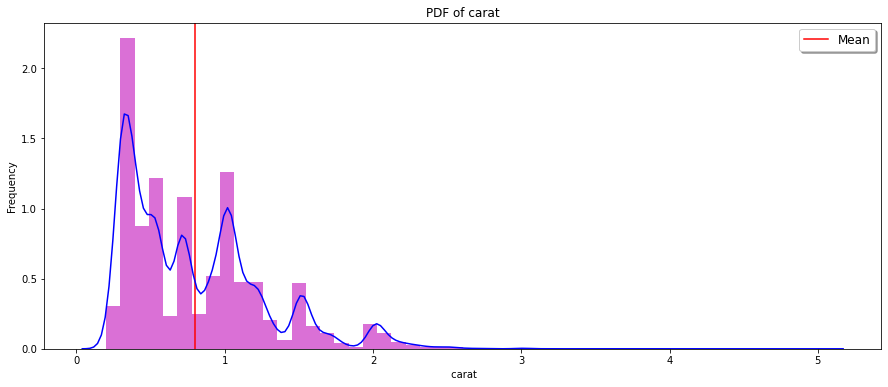

In [16]:
pdf_col('carat')

Skewness:1.618
Kurtosis:2.178


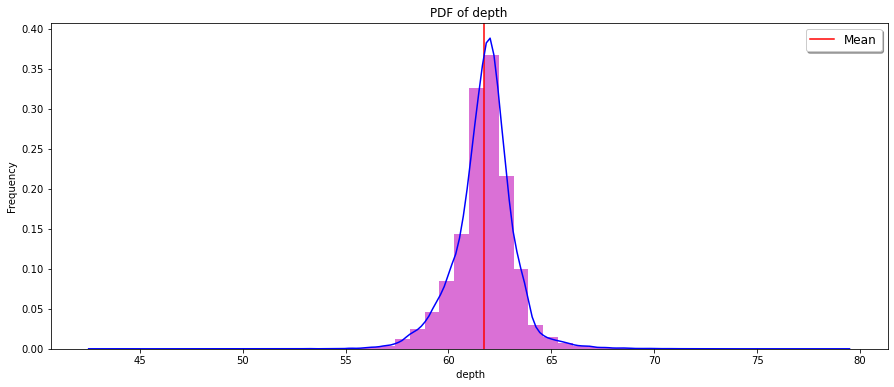

In [17]:
pdf_col('depth')

Skewness:1.618
Kurtosis:2.178


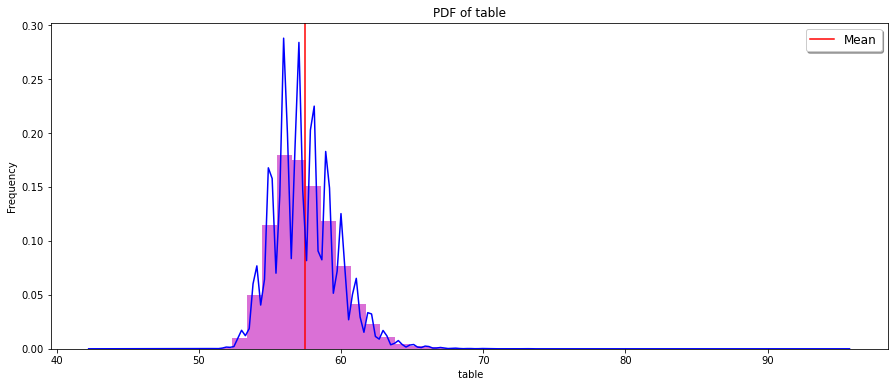

In [18]:
pdf_col('table')

Skewness:1.618
Kurtosis:2.178


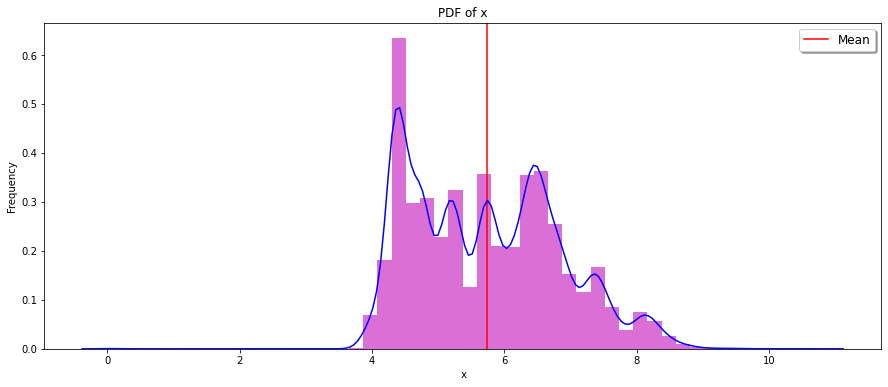

In [19]:
pdf_col('x')

Skewness:1.618
Kurtosis:2.178


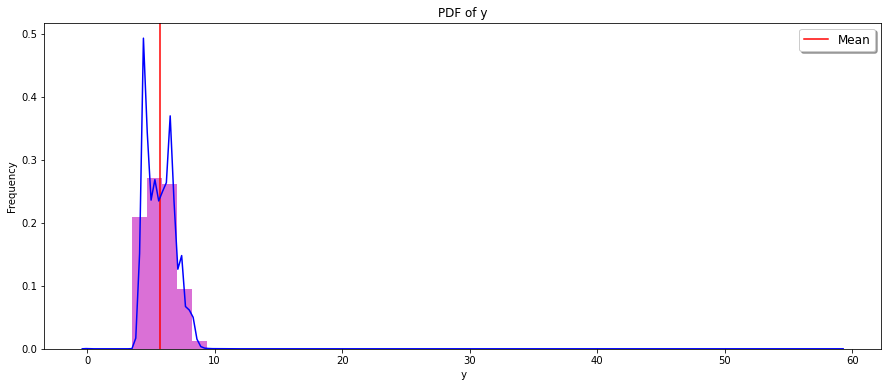

In [20]:
pdf_col('y')

Skewness:1.618
Kurtosis:2.178


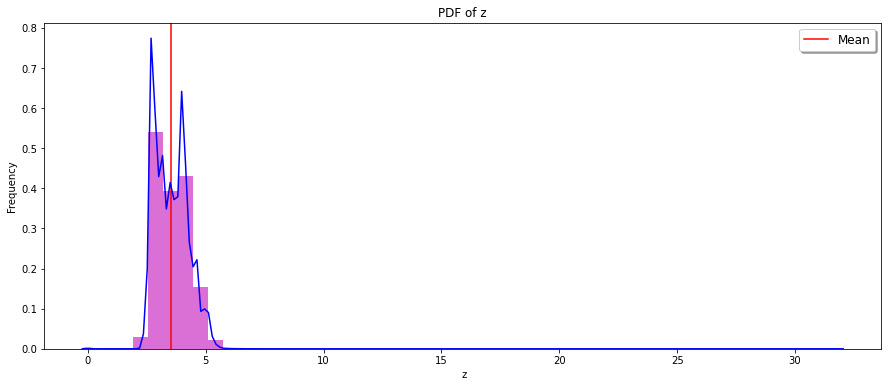

In [21]:
pdf_col('z')

Skewness:1.618
Kurtosis:2.178


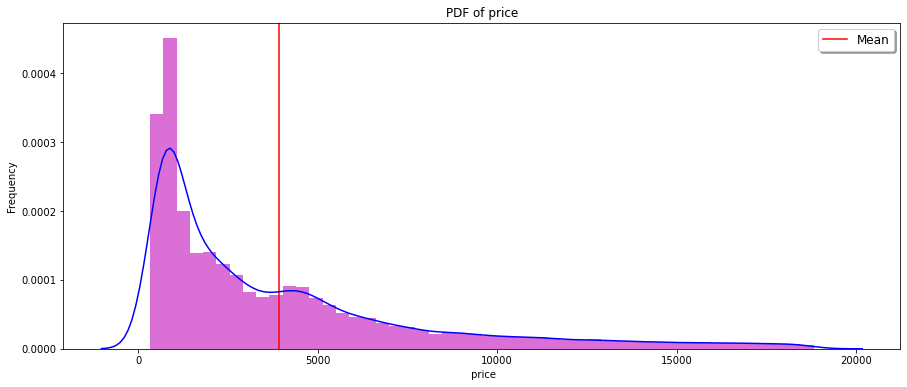

In [22]:
pdf_col('price')

### Frequency Distribution of each Categorical Variable by using Count Plot.

In [23]:
for i in catg_var:
    print(df[i].value_counts())
    print("####################################################################")

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
####################################################################
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
####################################################################
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
####################################################################


In [24]:
def catg(catg_var):
    plt.figure(figsize=(15,5))
    plt.xticks(rotation = 90)
    ax=sns.countplot(df[catg_var].dropna(), order=df[catg_var].value_counts().iloc[:15].index)
    for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+50))

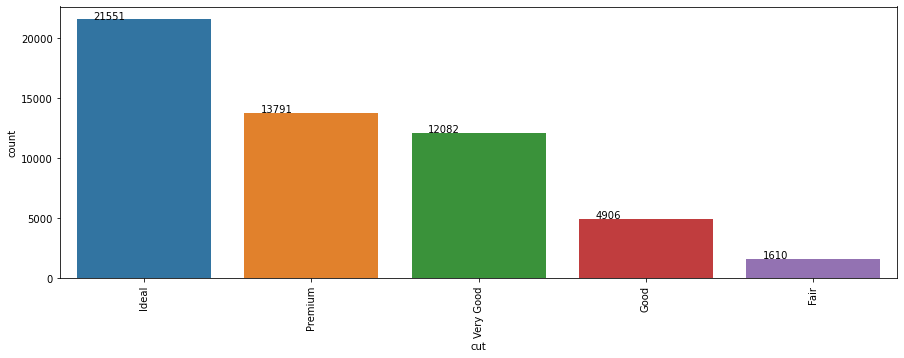

In [25]:
catg('cut')

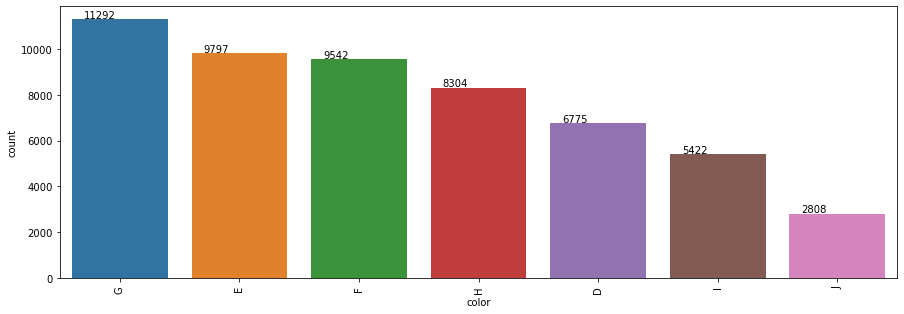

In [26]:
catg('color')

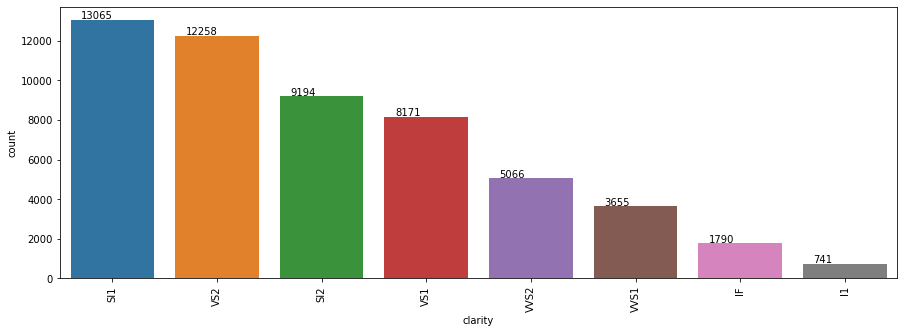

In [27]:
catg('clarity')

### Pair plot

<Figure size 1440x1080 with 0 Axes>

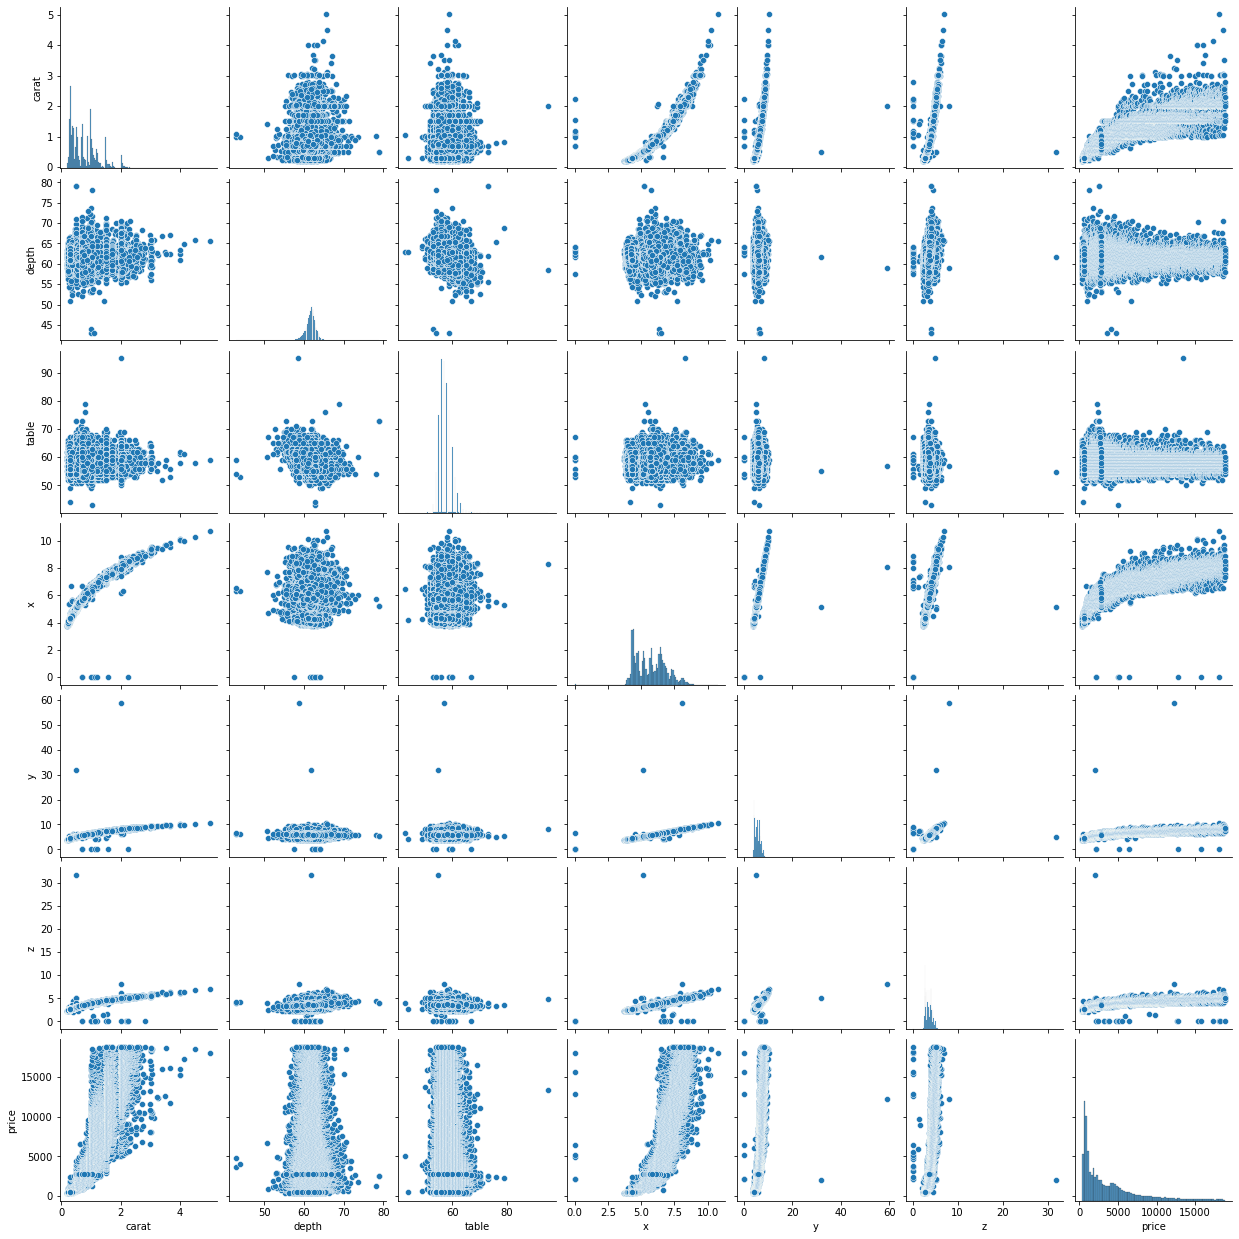

In [28]:
plt.figure(figsize=(20,15))
sns.pairplot(df[num_var])
plt.show()

### Outliers in Numerical column

In [29]:
outliers = pd.DataFrame(columns=['Feature','Outliers','Percentage']) 
    
for column in list(num_var):  
    # first quartile
    q1 = df[column].quantile(0.25)
    # third quartile
    q3 = df[column].quantile(0.75) 
    # Inter Quantile Range
    iqr = q3 - q1 
        
    lower_value = q1 - (1.5*iqr)        
    upper_value = q3 + (1.5*iqr)
        
    total_outlier = df[(df[column] < lower_value) | (df[column] > upper_value)].shape[0]    
    percent = (total_outlier / len(df[column])) * 100
    outliers = outliers.append({'Feature':column,'Outliers':total_outlier,'Percentage':percent},ignore_index=True)
        
outliers

,Feature,Outliers,Percentage
0,carat,1889,3.502039
1,depth,2545,4.718205
2,table,605,1.121617
3,x,32,0.059325
4,y,29,0.053763
5,z,49,0.090842
6,price,3540,6.562848


### Before and After Removing the outliers in Numerical Columns

### Box plot of Price 

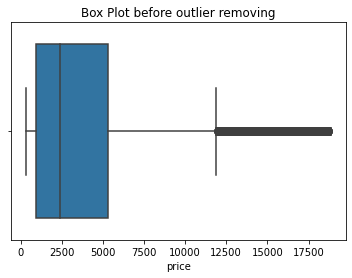

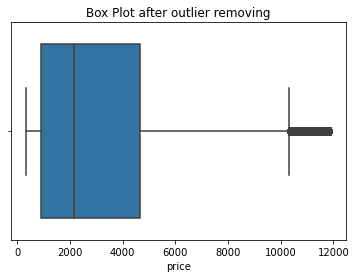

In [30]:
sns.boxplot(df['price'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'price')
sns.boxplot(df['price'])
plt.title("Box Plot after outlier removing")
plt.show()

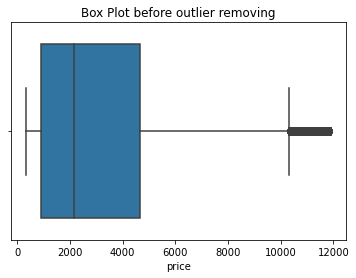

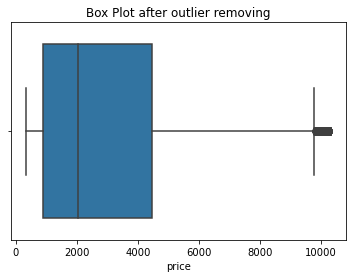

In [31]:
sns.boxplot(df['price'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'price')
sns.boxplot(df['price'])
plt.title("Box Plot after outlier removing")
plt.show()

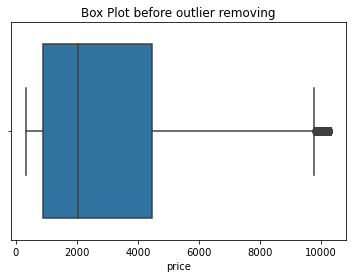

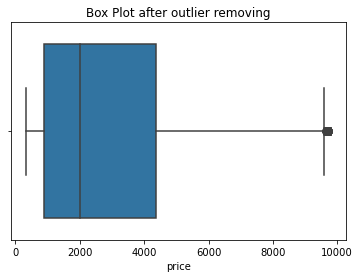

In [32]:
sns.boxplot(df['price'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'price')
sns.boxplot(df['price'])
plt.title("Box Plot after outlier removing")
plt.show()

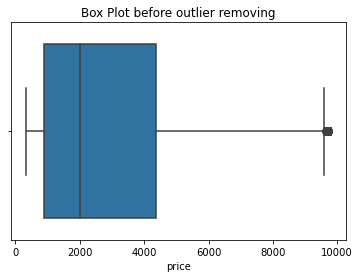

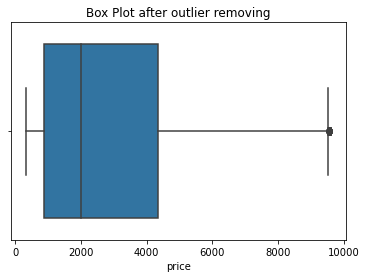

In [33]:
sns.boxplot(df['price'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'price')
sns.boxplot(df['price'])
plt.title("Box Plot after outlier removing")
plt.show()

### Box plot of Depth

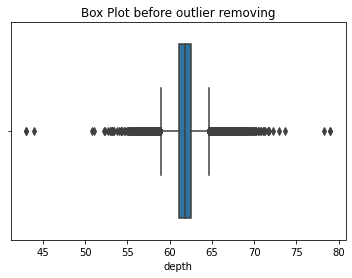

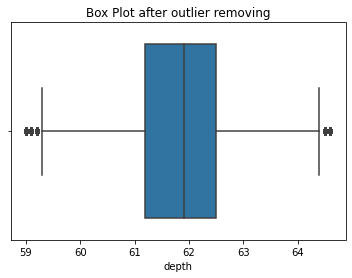

In [34]:
sns.boxplot(df['depth'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'depth')
sns.boxplot(df['depth'])
plt.title("Box Plot after outlier removing")
plt.show()

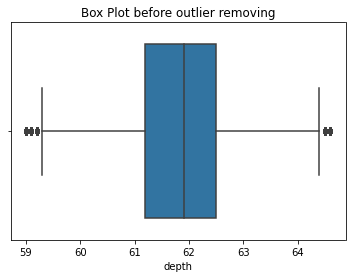

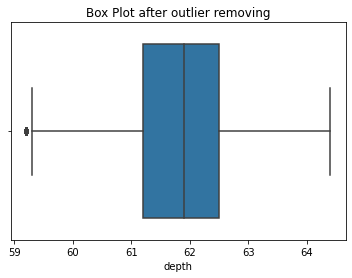

In [35]:
sns.boxplot(df['depth'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'depth')
sns.boxplot(df['depth'])
plt.title("Box Plot after outlier removing")
plt.show()

### Box Plot of Carat

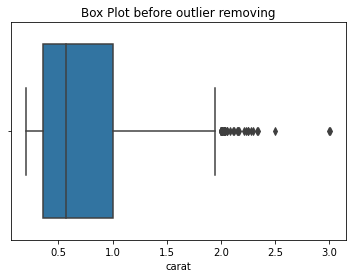

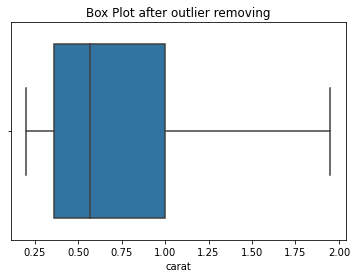

In [36]:
sns.boxplot(df['carat'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'carat')
sns.boxplot(df['carat'])
plt.title("Box Plot after outlier removing")
plt.show()

### Box plot of Table

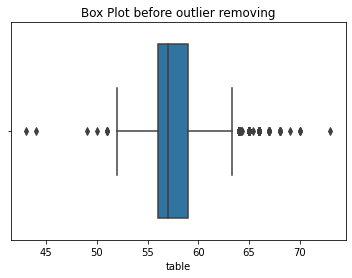

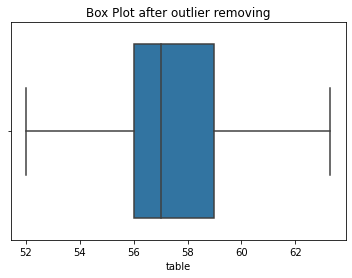

In [37]:
sns.boxplot(df['table'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'table')
sns.boxplot(df['table'])
plt.title("Box Plot after outlier removing")
plt.show()

### Box plot of x

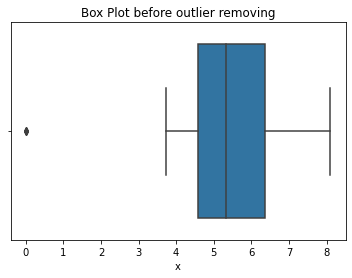

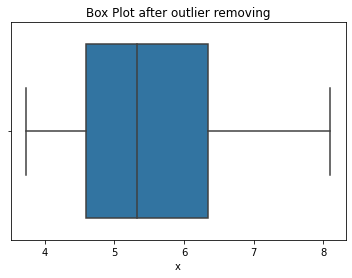

In [38]:
sns.boxplot(df['x'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'x')
sns.boxplot(df['x'])
plt.title("Box Plot after outlier removing")
plt.show()

### Box plot of y

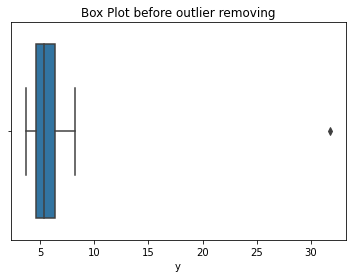

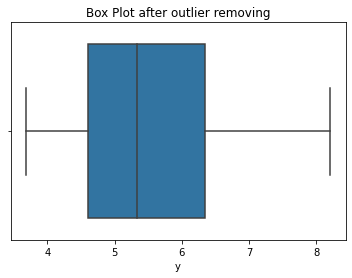

In [39]:
sns.boxplot(df['y'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'y')
sns.boxplot(df['y'])
plt.title("Box Plot after outlier removing")
plt.show()

### Box plot of z

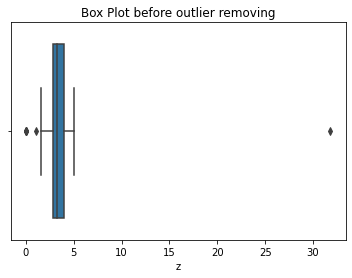

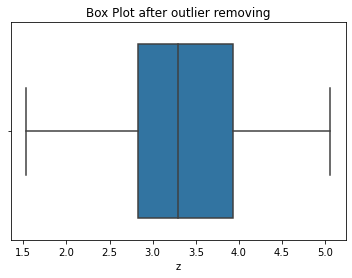

In [40]:
sns.boxplot(df['z'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'z')
sns.boxplot(df['z'])
plt.title("Box Plot after outlier removing")
plt.show()

<AxesSubplot:xlabel='color', ylabel='price'>

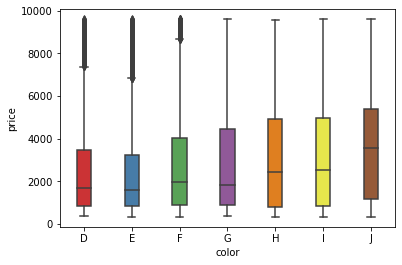

In [41]:
sns.boxplot(y='price',data=df,x='color',palette ='Set1',width =0.3,order = ['D','E','F','G','H','I','J'] )


<AxesSubplot:xlabel='cut', ylabel='price'>

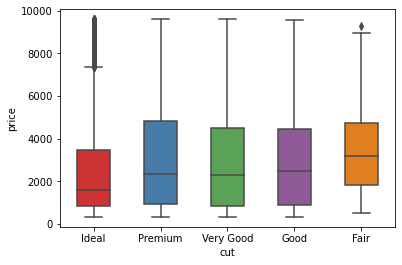

In [42]:
sns.boxplot(y='price',data=df,x='cut',palette ='Set1', width =0.5,order =['Ideal' ,'Premium' ,'Very Good' ,'Good' ,'Fair'] )


<AxesSubplot:xlabel='clarity', ylabel='price'>

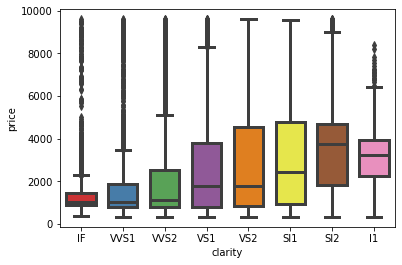

In [43]:
sns.boxplot(y='price',data=df,x='clarity',palette ='Set1', width =0.7,linewidth=3,order =['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])


### Price vs Clarity

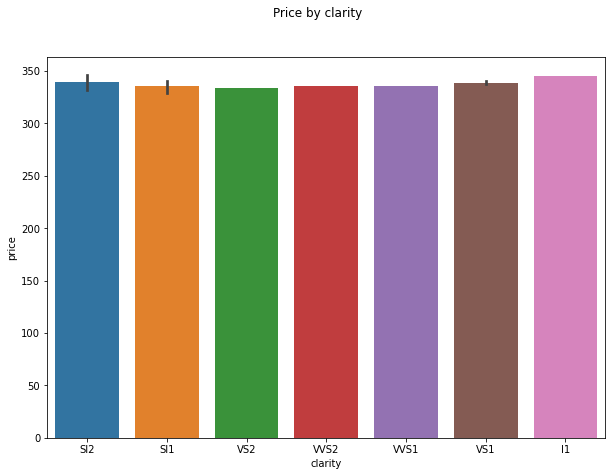

In [44]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['clarity'].iloc[:20], y=df['price'].iloc[:15])
plt.suptitle('Price by clarity')
plt.show()

### Price vs color

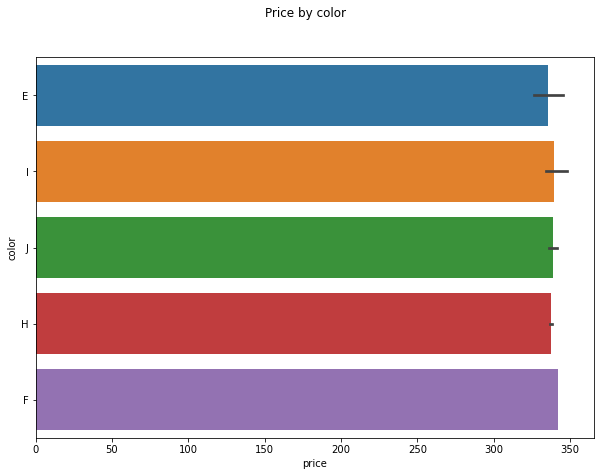

In [45]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['price'].iloc[:20], y=df['color'].iloc[:15])
plt.suptitle('Price by color')
plt.show()

### Price vs cut

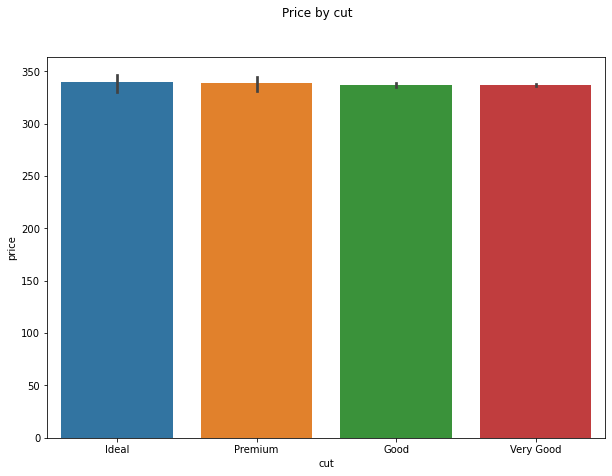

In [46]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['cut'].iloc[:20], y=df['price'].iloc[:15])
plt.suptitle('Price by cut')
plt.show()

In [47]:
df.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.050553,0.191656,0.987388,0.986437,0.986548,0.930705
depth,0.050553,1.000000,-0.218496,0.004170,0.002543,0.103876,0.025441
table,0.191656,-0.218496,1.000000,0.187271,0.181587,0.162503,0.147164
x,0.987388,0.004170,0.187271,1.000000,0.998422,0.993876,0.912950
y,0.986437,0.002543,0.181587,0.998422,1.000000,0.993699,0.913707
z,0.986548,0.103876,0.162503,0.993876,0.993699,1.000000,0.910670
price,0.930705,0.025441,0.147164,0.912950,0.913707,0.910670,1.000000


<AxesSubplot:>

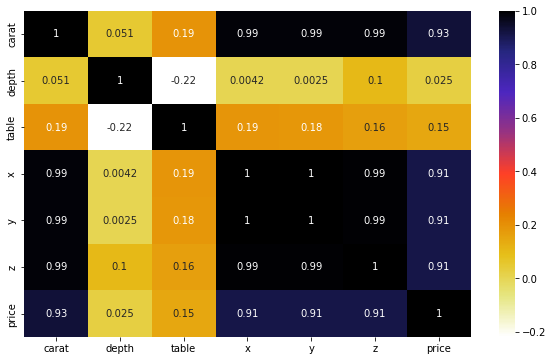

In [48]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot = True ,cmap=plt.cm.CMRmap_r)

#### From the above plot we can say that column 'x','y','z' are highly correlated with the target column 'price'

In [49]:
#Input and output dataset
y=df['price']
X=df.drop(['price'],axis=1)

In [50]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48


In [51]:
y.head()

0    326
1    326
3    334
4    335
5    336
Name: price, dtype: int64

### Split the Dataset into Train and Test

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

### Handling Categorical columns

In [53]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,cut,color,clarity
17394,Ideal,D,SI2
37253,Ideal,F,VVS2
34369,Ideal,F,VS2
32695,Ideal,F,VS2
38070,Premium,E,VVS2


In [54]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_train_cat['color'] = X_train_cat['color'].apply(lambda x : color_encoder[x])


### Label Encoding

In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [56]:
X_train_cat['cut']=le.fit_transform(X_train_cat['cut'])
X_train_cat['clarity']=le.fit_transform(X_train_cat['clarity'])

In [57]:
X_train_cat.head()

,cut,color,clarity
17394,2,7,3
37253,2,5,7
34369,2,5,5
32695,2,5,5
38070,3,6,7


### Handling Numerical columns

In [58]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,carat,depth,table,x,y,z
17394,0.32,62.8,57.0,4.38,4.35,2.74
37253,0.31,61.2,56.0,4.39,4.37,2.68
34369,0.41,62.3,57.0,4.75,4.78,2.97
32695,0.31,60.8,56.0,4.41,4.38,2.67
38070,0.30,61.8,58.0,4.29,4.26,2.64


In [59]:
X_train_cn = pd.concat([X_train_cat,X_train_num], axis=1)

X_train_cn.head()

,cut,color,clarity,carat,depth,table,x,y,z
17394,2,7,3,0.32,62.8,57.0,4.38,4.35,2.74
37253,2,5,7,0.31,61.2,56.0,4.39,4.37,2.68
34369,2,5,5,0.41,62.3,57.0,4.75,4.78,2.97
32695,2,5,5,0.31,60.8,56.0,4.41,4.38,2.67
38070,3,6,7,0.30,61.8,58.0,4.29,4.26,2.64


### Standardizing The Data

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_new = pd.DataFrame(scaler.fit_transform(X_train_cn), 
                                    columns = X_train_cn.columns, 
                                    index = X_train_cn.index)

X_train_new.head()

,cut,color,clarity,carat,depth,table,x,y,z
17394,-0.673248,1.502438,-0.513987,-1.039164,0.941458,-0.101754,-1.170667,-1.216054,-1.114959
37253,-0.673248,0.309726,1.797887,-1.068320,-0.599389,-0.600595,-1.159936,-1.194455,-1.218878
34369,-0.673248,0.309726,0.641950,-0.776758,0.459944,-0.101754,-0.773599,-0.751683,-0.716606
32695,-0.673248,0.309726,0.641950,-1.068320,-0.984601,-0.600595,-1.138473,-1.183656,-1.236197
38070,0.402308,0.906082,1.797887,-1.097477,-0.021571,0.397088,-1.267252,-1.313248,-1.288156


### Test Data Preprocessing

In [61]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,cut,color,clarity
33768,Very Good,F,VVS1
2636,Ideal,H,VS1
36311,Ideal,H,VVS1
53088,Ideal,D,SI1
30195,Premium,E,SI1


In [62]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_test_cat['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])


### Label Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [64]:
X_test_cat['cut']=le.fit_transform(X_test_cat['cut'])
X_test_cat['clarity']=le.fit_transform(X_test_cat['clarity'])

In [65]:
X_test_cat.head()

,cut,color,clarity
33768,4,5,6
2636,2,3,4
36311,2,3,6
53088,2,7,2
30195,3,6,2


### Handling numerical columns

In [66]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,carat,depth,table,x,y,z
33768,0.33,60.1,56.0,4.53,4.56,2.73
2636,0.71,60.8,57.0,5.74,5.79,3.51
36311,0.32,62.9,57.0,4.38,4.33,2.74
53088,0.70,62.5,56.0,5.67,5.73,3.56
30195,0.42,61.5,58.0,4.78,4.84,2.96


In [67]:
X_test_cn = pd.concat([X_test_cat,X_test_num], axis=1)

X_test_cn.head()

,cut,color,clarity,carat,depth,table,x,y,z
33768,4,5,6,0.33,60.1,56.0,4.53,4.56,2.73
2636,2,3,4,0.71,60.8,57.0,5.74,5.79,3.51
36311,2,3,6,0.32,62.9,57.0,4.38,4.33,2.74
53088,2,7,2,0.70,62.5,56.0,5.67,5.73,3.56
30195,3,6,2,0.42,61.5,58.0,4.78,4.84,2.96


### Standardizing the data

In [68]:

X_test_new = pd.DataFrame(scaler.transform(X_test_cn), 
                                    columns = X_test_cn.columns, 
                                    index = X_test_cn.index)

X_test_new.head()

,cut,color,clarity,carat,depth,table,x,y,z
33768,1.477864,0.309726,1.219919,-1.010008,-1.658721,-0.600595,-1.009694,-0.989268,-1.132279
2636,-0.673248,-0.882987,0.063982,0.097930,-0.984601,-0.101754,0.288829,0.339050,0.218657
36311,-0.673248,-0.882987,1.219919,-1.039164,1.037761,-0.101754,-1.170667,-1.237653,-1.114959
53088,-0.673248,1.502438,-1.091956,0.068774,0.652549,-0.600595,0.213708,0.274254,0.305255
30195,0.402308,0.906082,-1.091956,-0.747602,-0.310480,0.397088,-0.741404,-0.686887,-0.733926


## KNN Algorithm from Scratch

In [69]:
class KNN_Regression:
    def __init__(self,k):
        self.k=k
        
    def fit_func(self,X,y):
        self.X=np.asarray(X)
        self.y=np.asarray(y)
        
    def predict_func(self,X):
        X=np.asarray(X)
        predict=[]
        for x in X:
            distance=np.sqrt(np.sum((x-self.X)**2,axis=1))
            sort_value=distance.argsort()
            sort_value=sort_value[:self.k]
            predict.append(np.mean(self.y[sort_value]))
        return np.array(predict)

In [70]:
Model=KNN_Regression(k=3)
Model.fit_func(X_train_new,y_train)
y_pred_KNN=Model.predict_func(X_test_new)

In [71]:
new_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_KNN})

new_df.head()  

,Actual,Predicted
33768,841,810.333333
2636,3229,2759.000000
36311,936,840.333333
53088,2612,2949.666667
30195,722,776.666667


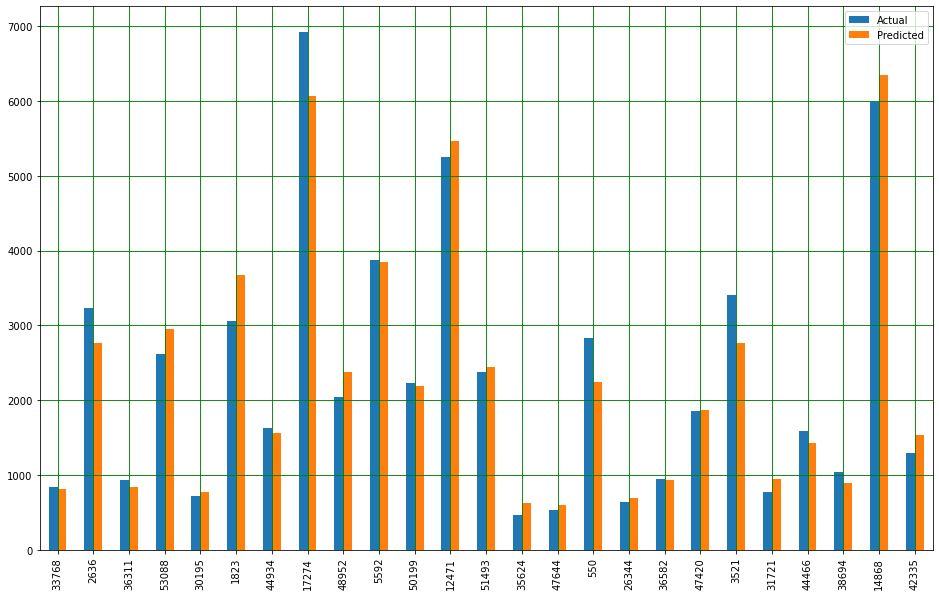

In [72]:
#Showing the difference between the actual and predicted value

df2 = new_df.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.9', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.9', color='black')
plt.show()

In [73]:
from sklearn import metrics
scratch_acu=metrics.r2_score(y_test,y_pred_KNN)
scratch_acu

0.9619729346161445

In [74]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_KNN))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_KNN))


print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_KNN)))

Mean Absolute Error:  267.8033958891868
Mean Squared Error:  209542.58174957798
Root Mean Squared Error:  457.7582131972926


## KNN Algorithm Using sklearn 

In [75]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_new, y_train)

KNeighborsRegressor()

In [76]:
y_test_pred = regressor.predict(X_test_new)

In [77]:
new_df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

new_df1.head()

,Actual,Predicted
33768,841,781.0
2636,3229,2661.6
36311,936,790.2
53088,2612,3070.4
30195,722,881.2


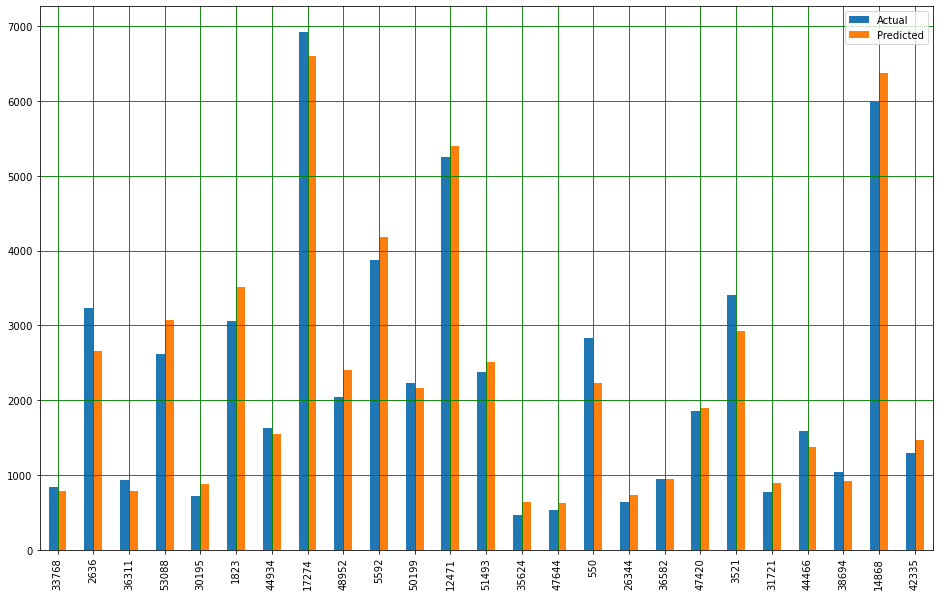

In [78]:
#Showing the difference between the actual and predicted value

df2 = new_df1.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.9', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.9', color='black')
plt.show()

In [79]:
sk_acu=metrics.r2_score(y_test,y_test_pred)
sk_acu

0.9634780280675349

In [80]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  263.0917605004468
Mean Squared Error:  201248.98442895446
Root Mean Squared Error:  448.607829210497


### Comparing R2 scores

In [81]:
print("Accuracy calculated using Numpy Broadcasting:",scratch_acu)
print("Accuracy calculated using Scikitlearn:",sk_acu)

Accuracy calculated using Numpy Broadcasting: 0.9619729346161445
Accuracy calculated using Scikitlearn: 0.9634780280675349
